In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read in input data

In [2]:
df = pd.ExcelFile(r'../Data/raw_data/41467_2019_13483_MOESM4_ESM.xlsx')

***Read in sheets from excel file***

In [3]:
exp_data = df.parse('Expression Data', index_col='log-TPM')
metadata = df.parse('Metadata')

In [4]:
exp_data.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
log-TPM,,,,,,,,,,,,,,,,,,,,,
b0002,11.006653,11.130196,11.704951,11.888217,11.064810,10.779071,9.976401,10.291135,11.229767,11.214065,...,10.271327,10.276565,11.148538,11.170578,11.676604,11.726097,11.881529,11.923237,11.496410,11.552762
b0003,10.415654,10.523138,11.423835,11.803781,10.776984,10.597810,9.596833,10.191503,10.897938,10.861157,...,10.160291,10.116861,10.314322,10.392251,10.916426,10.909277,11.023924,11.038426,10.624301,10.764195
b0004,10.594871,10.725062,10.457270,10.779162,10.394971,10.113950,8.741617,9.082231,10.185151,10.164655,...,10.475069,10.434352,10.679541,10.723953,11.143310,11.112721,11.184795,11.241845,10.953206,11.001006
b0005,6.316102,6.258499,5.422129,5.336121,6.716069,6.410864,4.626949,4.756153,6.527653,6.136168,...,5.979079,5.705586,6.306120,6.291340,5.058537,4.835550,5.448097,5.757951,5.873964,5.808618
b0006,6.915771,6.897597,6.775645,6.782605,6.761813,6.816532,6.686767,6.860036,6.862147,6.817480,...,8.371287,8.322390,8.137515,8.071837,7.354131,7.365536,7.328101,7.314761,8.057750,8.105213


In [5]:
metadata.head()

,Sample ID,Study,Project ID,Condition ID,Replicate #,Strain Description,Strain,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),...,Culture Type,Growth Rate (1/hr),Evolved Sample,Isolate Type,Sequencing Machine,Additional Details,Biological Replicates,Alignment,DOI,GEO
0,control__wt_glc__1,Control,control,wt_glc,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,NaN,No,NaN,MiSeq,NaN,2,94.33,doi.org/10.1101/080929,GSE65643
1,control__wt_glc__2,Control,control,wt_glc,2,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,NaN,No,NaN,MiSeq,NaN,2,94.24,doi.org/10.1101/080929,GSE65643
2,fur__wt_dpd__1,Fur,fur,wt_dpd,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,0.000000,No,NaN,MiSeq,NaN,2,98.04,doi.org/10.1038/ncomms5910,GSE54900
3,fur__wt_dpd__2,Fur,fur,wt_dpd,2,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,0.000000,No,NaN,MiSeq,NaN,2,98.30,doi.org/10.1038/ncomms5910,GSE54900
4,fur__wt_fe__1,Fur,fur,wt_fe,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,1.060606,No,NaN,MiSeq,NaN,2,93.35,doi.org/10.1038/ncomms5910,GSE54900


***Remove all Sample IDs that contain no growth rate information***

In [6]:
metadata_clean = metadata.dropna(subset=['Growth Rate (1/hr)'])
metadata_clean = metadata_clean[metadata_clean['Growth Rate (1/hr)'] != 0]

# Determine distribution of different variables in metadata dataset

<AxesSubplot:ylabel='Frequency'>

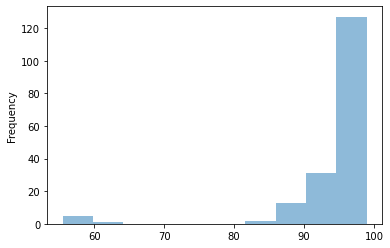

In [7]:
metadata_clean['Alignment'].plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

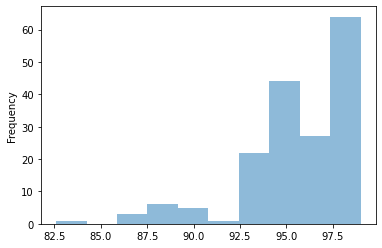

In [8]:
#Remove all Sample IDs where the alignment is less than 80%
metadata_clean = metadata_clean[metadata_clean['Alignment'] > 80]
metadata_clean['Alignment'].plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

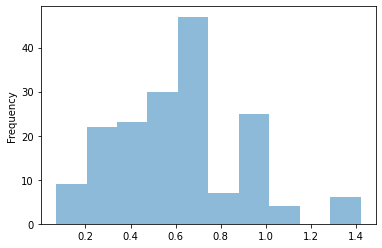

In [9]:
metadata_clean['Growth Rate (1/hr)'].plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

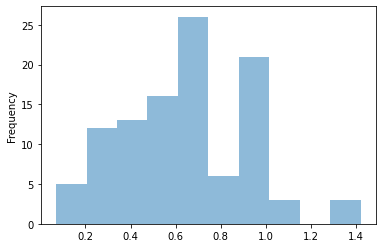

In [10]:
metadata_clean[metadata_clean['Replicate #'] == 1]['Growth Rate (1/hr)'].plot.hist(alpha=0.5)

In [11]:
#Count the number of strains to determine low counts
metadata_clean['Strain'].value_counts()

MG1655     151
BW25113     22
Name: Strain, dtype: int64

***Remove all columns (Sample IDs) in expression dataset if there was no growth rate information found***

In [12]:
exp_data_clean = exp_data[metadata_clean['Sample ID']]
assert list(metadata_clean['Sample ID']) == list(exp_data_clean.columns)

# Average across replicates and drop them

In [13]:
import copy

In [14]:
cols = []
unique_cols = []
exp_data_fin = copy.deepcopy(exp_data_clean)

#Rename columns in dataframe
for column in exp_data_clean.columns:
    cols.append(column[:-3])
    #Get names of unique columns
    if column[:-3] not in unique_cols:
        unique_cols.append(column[:-3])

exp_data_fin.columns = cols

#New dataframe with averaged replicates and no duplicates
exp_data_fin = exp_data_fin[unique_cols].groupby(level=0, axis=1).mean()

In [15]:
#Average growth rate in metadata df

cond = []
unique_cond = []
metadata_fin = copy.deepcopy(metadata_clean)

for condition in metadata_clean['Sample ID']:
    cond.append(condition[:-3])
    if condition[:-3] not in unique_cond:
        unique_cond.append(condition[:-3])
        
metadata_fin['Sample ID'] = cond

#New dataframe with averaged replicates and no duplicates
metadata_fin = metadata_fin.groupby('Sample ID').mean()

In [16]:
#Number or columns in expression data frame should match number of unique replicates in metadata
print(exp_data_fin.shape)
print(metadata_clean['Replicate #'].value_counts())

(3923, 105)
1    105
2     64
6      1
5      1
4      1
3      1
Name: Replicate #, dtype: int64


In [17]:
exp_data_clean.head()

print((exp_data_clean['fur__wt_fe__1']['b0002'] + exp_data_clean['fur__wt_fe__2']['b0002']) / 2)
print(exp_data_fin['fur__wt_fe']['b0002'])

10.9219405247384
10.9219405247384


In [18]:
exp_data_fin.shape

(3923, 105)

In [19]:
metadata_fin.shape

(105, 6)

# Summary statistics of gene expression

<AxesSubplot:ylabel='Frequency'>

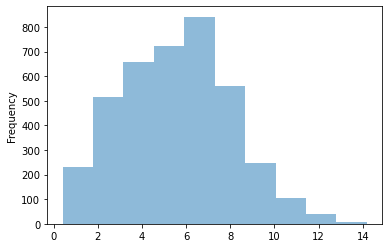

In [20]:
#Mean of expression data for each gene
exp_data_fin.mean(axis='columns').plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

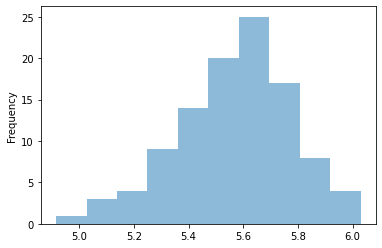

In [21]:
exp_data_fin.mean(axis='rows').plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

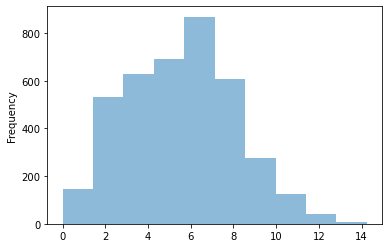

In [22]:
#Median of expression data for each gene
exp_data_fin.median(axis='columns').plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

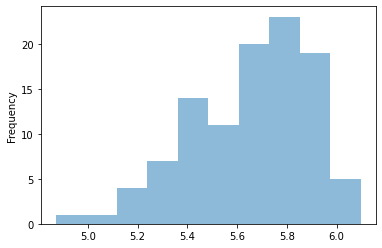

In [23]:
exp_data_fin.median(axis='rows').plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

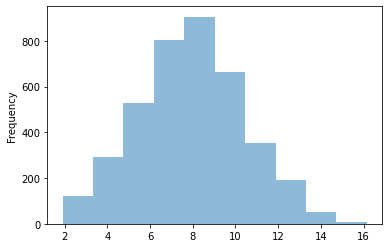

In [24]:
#Max of expression data for each gene
exp_data_fin.max(axis='columns').plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

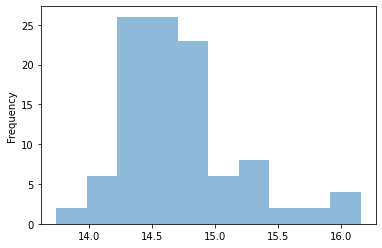

In [25]:
exp_data_fin.max(axis='rows').plot.hist(alpha=0.5)

***Determining variance within the expression dataset***

<AxesSubplot:ylabel='Frequency'>

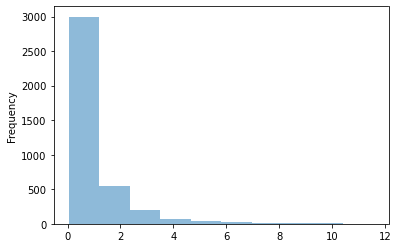

In [26]:
#Variance of expression data for each gene
exp_data_fin.var(axis='columns').plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

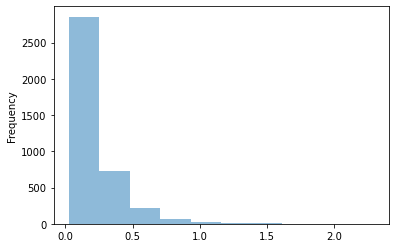

In [27]:
(exp_data_fin.std(axis='columns') / exp_data_fin.mean(axis='columns')).plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

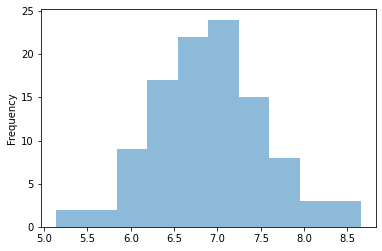

In [28]:
exp_data_fin.var(axis='rows').plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

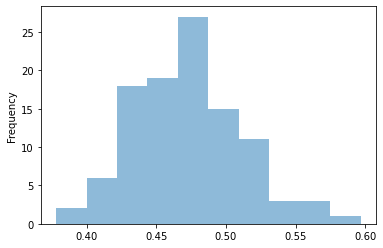

In [29]:
(exp_data_fin.std(axis='rows') / exp_data_fin.mean(axis='rows')).plot.hist(alpha=0.5)

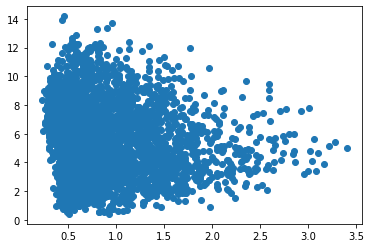

In [30]:
#Look at correlation between std and average gene expression
x_data = exp_data_fin.std(axis='columns')
y_data = exp_data_fin.mean(axis='columns')

fig, ax = plt.subplots()
ax.scatter(x_data, y_data)

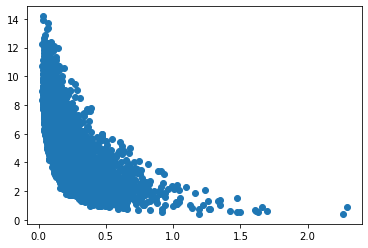

In [31]:
fig, ax = plt.subplots()
ax.scatter(x_data/y_data, y_data)

In [32]:
#Check if there are any NaN values for each gene
exp_data_fin[exp_data_fin.isnull().sum(axis='columns') != 0]

,42c__42c_ale1,42c__42c_ale10,42c__42c_ale2,42c__42c_ale3,42c__42c_ale4,42c__42c_ale5,42c__42c_ale6,42c__42c_ale8,42c__42c_ale9,42c__wt_42c,...,ytf__delydcI_ph5,ytf__delydcI_ph8,ytf__delyddM,ytf__delyeiE,ytf__delyheO,ytf__delyiaJ,ytf__delyieP,ytf__wt_glc,ytf__wt_ph5,ytf__wt_ph8
log-TPM,,,,,,,,,,,,,,,,,,,,,


In [33]:
exp_data_fin.shape

(3923, 105)

<AxesSubplot:ylabel='Frequency'>

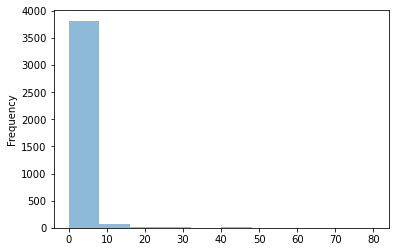

In [34]:
#Determine no expression for each gene per condition. Should we remove any?
exp_data_fin.isin([0]).sum(axis='columns').plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

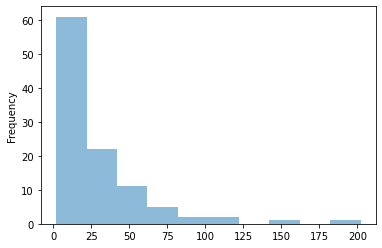

In [35]:
exp_data_fin.isin([0]).sum(axis='rows').plot.hist(alpha=0.5)

# Construct an all-to-all matrix to visualize conditions correlations

In [36]:
#Spearman correlation of conditions
condition_corr = exp_data_fin.corr(method='spearman')
condition_corr.head()

,42c__42c_ale1,42c__42c_ale10,42c__42c_ale2,42c__42c_ale3,42c__42c_ale4,42c__42c_ale5,42c__42c_ale6,42c__42c_ale8,42c__42c_ale9,42c__wt_42c,...,ytf__delydcI_ph5,ytf__delydcI_ph8,ytf__delyddM,ytf__delyeiE,ytf__delyheO,ytf__delyiaJ,ytf__delyieP,ytf__wt_glc,ytf__wt_ph5,ytf__wt_ph8
42c__42c_ale1,1.000000,0.927120,0.882641,0.862337,0.890492,0.844707,0.934393,0.910083,0.853765,0.836816,...,0.806675,0.798028,0.828742,0.840311,0.902051,0.864096,0.889329,0.841736,0.803002,0.802468
42c__42c_ale10,0.927120,1.000000,0.931647,0.909807,0.963706,0.902406,0.919654,0.961923,0.890414,0.843208,...,0.836582,0.841167,0.846182,0.830256,0.861610,0.841320,0.898360,0.876208,0.832988,0.839818
42c__42c_ale2,0.882641,0.931647,1.000000,0.964109,0.956908,0.968556,0.856027,0.918062,0.963966,0.902696,...,0.899551,0.901670,0.888363,0.876668,0.827253,0.818446,0.865943,0.904547,0.892907,0.902017
42c__42c_ale3,0.862337,0.909807,0.964109,1.000000,0.938152,0.974434,0.858418,0.896590,0.965164,0.900097,...,0.897568,0.896120,0.888025,0.880415,0.811377,0.803547,0.851940,0.880488,0.888256,0.896066
42c__42c_ale4,0.890492,0.963706,0.956908,0.938152,1.000000,0.930396,0.887814,0.955125,0.919252,0.875380,...,0.869244,0.874356,0.863983,0.849296,0.835690,0.823237,0.879365,0.894170,0.863277,0.872864


In [37]:
#Check scatterplot of different conditions (highest and lowest) (walk before you can run)

In [38]:
condition_corr.min()

42c__42c_ale1     0.723667
42c__42c_ale10    0.711363
42c__42c_ale2     0.741030
42c__42c_ale3     0.693697
42c__42c_ale4     0.705997
                    ...   
ytf__delyiaJ      0.758619
ytf__delyieP      0.749635
ytf__wt_glc       0.776021
ytf__wt_ph5       0.756173
ytf__wt_ph8       0.753845
Length: 105, dtype: float64

In [39]:
condition_corr[condition_corr['42c__42c_ale3'] < 0.7]

,42c__42c_ale1,42c__42c_ale10,42c__42c_ale2,42c__42c_ale3,42c__42c_ale4,42c__42c_ale5,42c__42c_ale6,42c__42c_ale8,42c__42c_ale9,42c__wt_42c,...,ytf__delydcI_ph5,ytf__delydcI_ph8,ytf__delyddM,ytf__delyeiE,ytf__delyheO,ytf__delyiaJ,ytf__delyieP,ytf__wt_glc,ytf__wt_ph5,ytf__wt_ph8
ica__cytd_rib,0.758384,0.715509,0.74103,0.693697,0.705997,0.710104,0.663555,0.705444,0.732324,0.730249,...,0.746453,0.746933,0.789988,0.742409,0.765622,0.758619,0.749635,0.776021,0.756173,0.753845


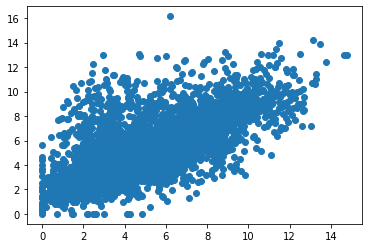

In [40]:
#Weakest correlation between conditions
fig, ax = plt.subplots()
ax.scatter(exp_data_fin['42c__42c_ale3'], exp_data_fin['ica__cytd_rib'])

In [41]:
condition_corr[condition_corr < 0.999].max()

42c__42c_ale1     0.934562
42c__42c_ale10    0.963706
42c__42c_ale2     0.968556
42c__42c_ale3     0.974434
42c__42c_ale4     0.963706
                    ...   
ytf__delyiaJ      0.972634
ytf__delyieP      0.973503
ytf__wt_glc       0.977862
ytf__wt_ph5       0.993878
ytf__wt_ph8       0.993076
Length: 105, dtype: float64

In [42]:
condition_corr[condition_corr['ytf__wt_ph5'] > 0.98]

,42c__42c_ale1,42c__42c_ale10,42c__42c_ale2,42c__42c_ale3,42c__42c_ale4,42c__42c_ale5,42c__42c_ale6,42c__42c_ale8,42c__42c_ale9,42c__wt_42c,...,ytf__delydcI_ph5,ytf__delydcI_ph8,ytf__delyddM,ytf__delyeiE,ytf__delyheO,ytf__delyiaJ,ytf__delyieP,ytf__wt_glc,ytf__wt_ph5,ytf__wt_ph8
ytf__delybaQ,0.816862,0.844833,0.910852,0.912131,0.877529,0.918723,0.816250,0.880823,0.908688,0.942458,...,0.981462,0.977992,0.978786,0.957309,0.890651,0.894288,0.920650,0.968890,0.981701,0.980514
ytf__delydcI_ph5,0.806675,0.836582,0.899551,0.897568,0.869244,0.907948,0.808905,0.874429,0.896824,0.940377,...,1.000000,0.976498,0.967396,0.956698,0.884688,0.896383,0.915772,0.965432,0.993878,0.975850
ytf__wt_ph5,0.803002,0.832988,0.892907,0.888256,0.863277,0.897902,0.806133,0.874055,0.887151,0.938637,...,0.993878,0.973164,0.971499,0.956894,0.891568,0.905092,0.922027,0.968824,1.000000,0.975668


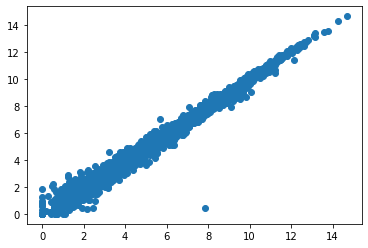

In [43]:
#Strongest correlation between conditions
fig, ax = plt.subplots()
ax.scatter(exp_data_fin['ytf__wt_ph5'], exp_data_fin['ytf__delydcI_ph5'])

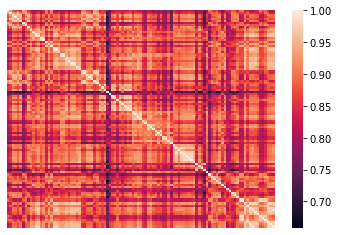

In [44]:
#Visualize conditions matrix
sns.heatmap(condition_corr, yticklabels=False, xticklabels=False)
plt.show()

### Hierarchical and kmean clustering

/home/sahil/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


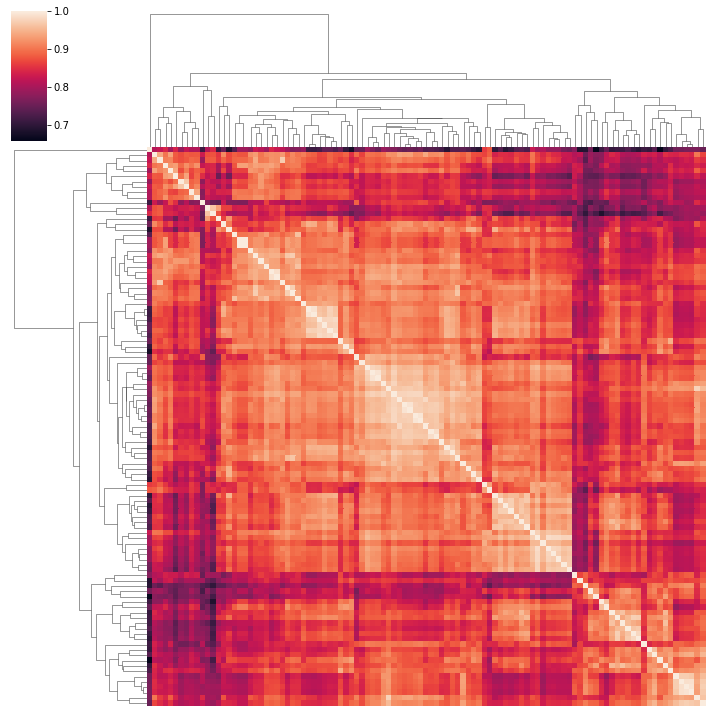

In [45]:
#Hierarchical clustering of condition correlations
sns.clustermap(condition_corr, yticklabels=False, xticklabels=False)

In [46]:
#Importing required modules

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(12)

In [47]:
#Transform the data
pca = PCA(2)
condition_kmeans_df = pca.fit_transform(condition_corr)
 
condition_kmeans_df.shape

(105, 2)

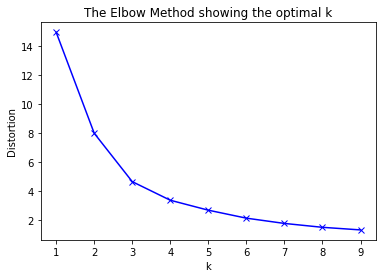

In [48]:
#Determine clusters
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(condition_kmeans_df)
    distortions.append(kmeanModel.inertia_)
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [49]:
#Initialize the class object
kmeans = KMeans(n_clusters = 6)
 
#predict the labels of clusters.
label = kmeans.fit_predict(condition_kmeans_df)
 
print(label)

[2 5 0 0 5 0 2 5 0 0 4 3 3 4 3 5 0 5 3 3 0 4 3 3 4 3 3 3 3 5 5 0 0 0 5 5 0
 4 0 1 1 0 0 5 0 4 0 3 0 4 3 3 3 4 1 3 3 4 4 4 4 1 1 4 1 3 3 4 3 3 3 3 3 3
 1 0 4 1 4 2 5 0 5 3 4 3 2 2 5 5 0 2 2 3 0 3 3 3 0 2 2 5 3 3 3]


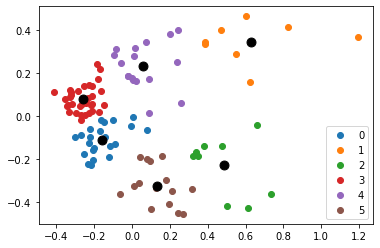

In [50]:
#Getting unique labels
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(condition_kmeans_df[label == i , 0] , condition_kmeans_df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color='black')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Kmeans_label'>

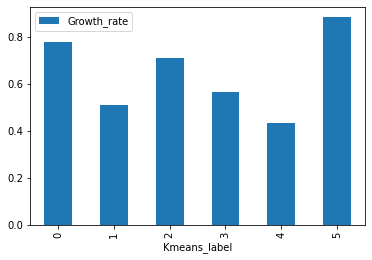

In [51]:
#Make bar plot showing if clusters are correlated with growth rates (averages and standard deviations)

kmeans_df = pd.DataFrame(data=zip(exp_data_fin.columns.tolist(), metadata_fin['Growth Rate (1/hr)'],list(label)), columns=['Condition', 'Growth_rate', 'Kmeans_label'])
conditions_avg = kmeans_df.groupby(['Kmeans_label']).mean().reset_index()
conditions_avg.plot.bar(x='Kmeans_label', y='Growth_rate')

### Conditions null model

In [52]:
#Null models
null_data = copy.deepcopy(exp_data_fin)

for i in range(99):
    for r in range(len(exp_data_clean)):
        null_data.iloc[r] = np.random.permutation(null_data.iloc[r].values)

/home/sahil/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


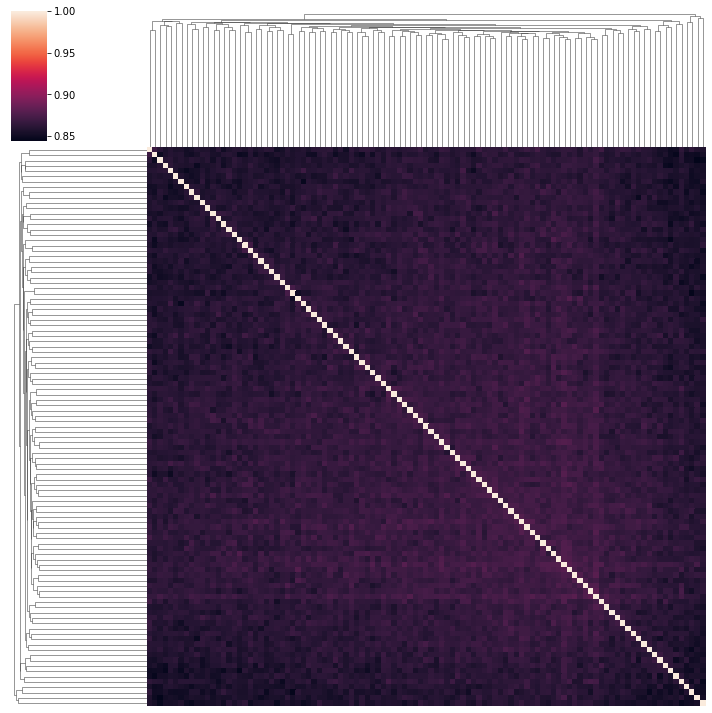

In [53]:
#Null model correlations
condition_corr_null = null_data.corr(method='spearman')
#Hierarchical clustering of condition correlations from null model
sns.clustermap(condition_corr_null, yticklabels=False, xticklabels=False)

In [54]:
#Transform the data
pca = PCA(2)
condition_null_df = pca.fit_transform(condition_corr_null)
 
condition_null_df.shape

(105, 2)

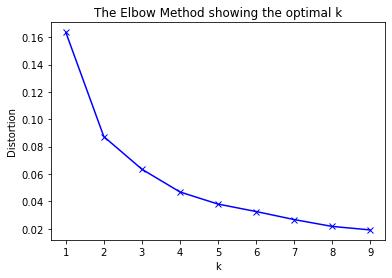

In [55]:
#Determine clusters
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(condition_null_df)
    distortions.append(kmeanModel.inertia_)
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [56]:
#Initialize the class object
kmeans = KMeans(n_clusters = 6)
 
#predict the labels of clusters.
label = kmeans.fit_predict(condition_null_df)
 
print(label)

[0 4 3 1 4 0 4 2 4 5 0 3 5 2 4 2 3 2 2 3 4 1 2 4 5 4 0 2 1 2 4 0 1 0 5 5 0
 4 1 2 3 0 2 0 3 3 2 3 4 3 3 2 1 2 0 0 0 5 4 3 0 1 5 1 0 2 0 0 0 4 3 3 3 3
 5 0 2 1 4 1 2 1 2 3 2 1 0 3 0 4 3 4 0 0 3 1 4 3 1 3 2 2 3 1 1]


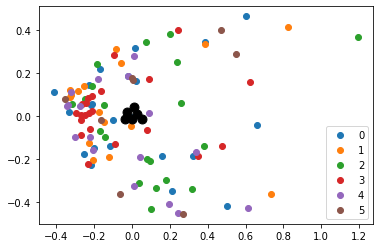

In [57]:
#Getting unique labels
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(condition_kmeans_df[label == i , 0] , condition_kmeans_df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color='black')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Kmeans_label'>

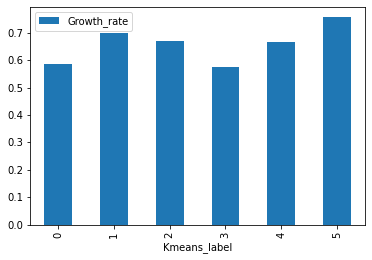

In [58]:
#Make bar plot showing if clusters are correlated with growth rates (averages and standard deviations)

kmeans_df = pd.DataFrame(data=zip(exp_data_fin.columns.tolist(), metadata_fin['Growth Rate (1/hr)'],list(label)), columns=['Condition', 'Growth_rate', 'Kmeans_label'])
conditions_avg = kmeans_df.groupby(['Kmeans_label']).mean().reset_index()
conditions_avg.plot.bar(x='Kmeans_label', y='Growth_rate')

### Find correlation between PCAs and Growth Rate

In [59]:
#PCA dataframe
principal_df = pd.DataFrame(data=condition_kmeans_df, columns=['PCA1', 'PCA2'])

#Spearman correlation of PCA1 and Growth Rate
growth_rate_list = metadata_fin['Growth Rate (1/hr)'].tolist()
print(stats.spearmanr(principal_df['PCA1'], growth_rate_list))

SpearmanrResult(correlation=-0.0053966485126356245, pvalue=0.9564271630195134)


[44.2 67.1 82.4 89.  92.8]


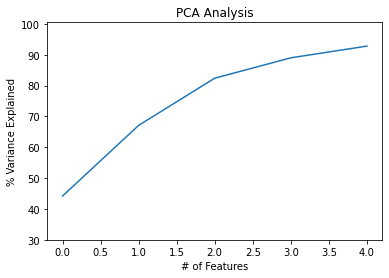

In [60]:
#Transform the data and find variance to explain data
pca = PCA(5)

covar_matrix = pca.fit(condition_corr)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
print(var)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

# Construct an all-to-all matrix to visualize gene correlations

In [61]:
#Transpose expression data
exp_data_t = exp_data_fin.T
#Spearman correlation of genes
gene_corr = exp_data_t.corr(method='spearman')
gene_corr.head()

log-TPM,b0002,b0003,b0004,b0005,b0006,b0007,b0008,b0009,b0010,b0011,...,b4660_1,b4661,b4662,b4676,b4686,b4688,b4693,b4696_1,b4696_2,b4705
log-TPM,,,,,,,,,,,,,,,,,,,,,
b0002,1.000000,0.856064,0.820464,0.458457,0.343507,-0.249416,0.373613,-0.165899,-0.316853,-0.438500,...,0.028189,-0.284311,-0.061533,-0.208830,-0.352790,-0.336292,-0.218460,-0.299675,-0.447291,-0.394190
b0003,0.856064,1.000000,0.945573,0.614242,0.415910,-0.216552,0.361152,-0.200680,-0.231252,-0.366356,...,0.106166,-0.235182,-0.071374,-0.270495,-0.353759,-0.310823,-0.153158,-0.236229,-0.399613,-0.381271
b0004,0.820464,0.945573,1.000000,0.576921,0.461276,-0.248887,0.355750,-0.217983,-0.152453,-0.430891,...,0.198607,-0.241951,-0.161726,-0.344221,-0.413870,-0.330475,-0.190510,-0.243890,-0.414749,-0.423422
b0005,0.458457,0.614242,0.576921,1.000000,0.183626,-0.071714,0.210892,0.041567,-0.030526,-0.117184,...,-0.088055,-0.255501,0.125308,0.070620,0.050222,0.120176,-0.305926,-0.394523,-0.302039,0.031810
b0006,0.343507,0.415910,0.461276,0.183626,1.000000,-0.165318,0.443964,-0.211607,-0.172699,-0.311400,...,0.085904,-0.190355,-0.091105,-0.160511,-0.316190,-0.421297,-0.176846,-0.056433,-0.220502,-0.346062


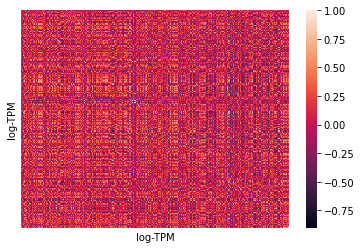

In [62]:
#Visualize genes matrix
sns.heatmap(gene_corr, yticklabels=False, xticklabels=False)
plt.show()

/home/sahil/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


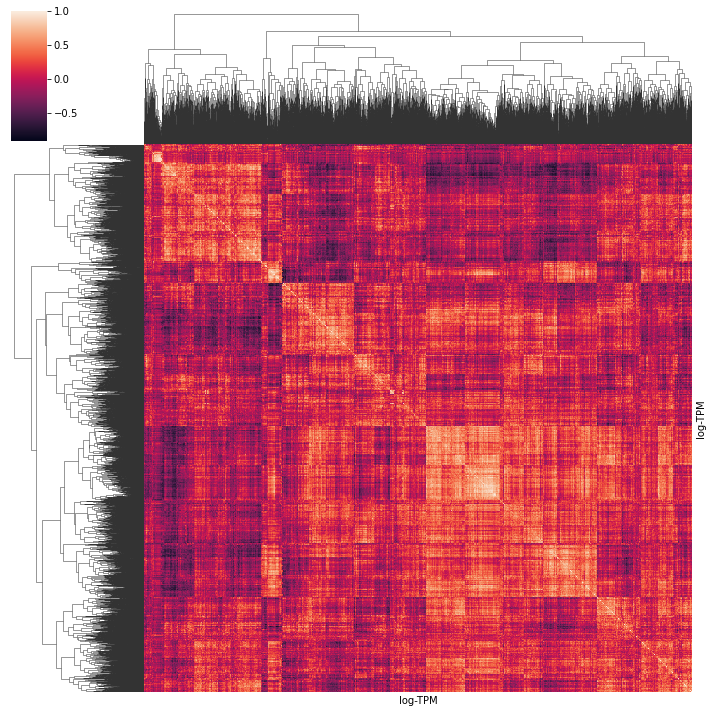

In [63]:
#Hierarchcal clustering of gene correlations
sns.clustermap(gene_corr, yticklabels=False, xticklabels=False)

In [64]:
#Transform the data
pca = PCA(2)
gene_kmeans_df = pca.fit_transform(gene_corr)
 
gene_kmeans_df.shape

(3923, 2)

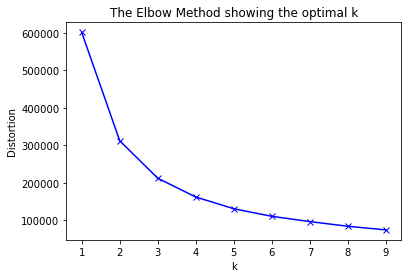

In [65]:
#Determine clusters
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(gene_kmeans_df)
    distortions.append(kmeanModel.inertia_)
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [66]:
#Initialize the class object
kmeans = KMeans(n_clusters = 6)
 
#predict the labels of clusters.
label = kmeans.fit_predict(gene_kmeans_df)
 
print(label)

[0 0 0 ... 1 1 4]


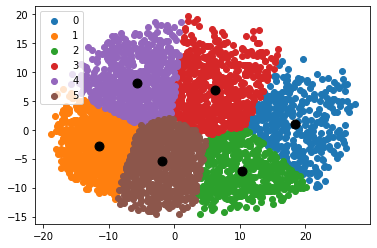

In [67]:
#Getting unique labels
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(gene_kmeans_df[label == i , 0] , gene_kmeans_df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color='black')
plt.legend()
plt.show()

### Find correlation between PCAs and average gene expression of each gene

In [68]:
avg_expression_list = []

for g in exp_data_clean.values:
    avg_expression_list.append(np.mean(g))

In [75]:
#PCA dataframe
pca = PCA(10)
gene_pca = pca.fit_transform(gene_corr)
principal_df = pd.DataFrame(data=gene_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10'])

#Spearman correlation of PCA1 and Growth Rate
for pca in principal_df.columns:
    print(stats.spearmanr(principal_df[pca], avg_expression_list))

SpearmanrResult(correlation=0.45320315339204126, pvalue=4.979003816812834e-198)
SpearmanrResult(correlation=0.0422983000970212, pvalue=0.008057586791609273)
SpearmanrResult(correlation=-0.2169929800870987, pvalue=5.027954136302612e-43)
SpearmanrResult(correlation=-0.054296916031423524, pvalue=0.0006683315665147234)
SpearmanrResult(correlation=-0.12898798461399125, pvalue=5.04779101922359e-16)
SpearmanrResult(correlation=-0.22816132429606198, pvalue=1.6826703180361658e-47)
SpearmanrResult(correlation=-0.039122021099962316, pvalue=0.014264993132732046)
SpearmanrResult(correlation=0.035012259706676915, pvalue=0.028312688511684572)
SpearmanrResult(correlation=-0.04039593079835947, pvalue=0.011393923706726058)
SpearmanrResult(correlation=-0.03490942965897728, pvalue=0.028780373712727604)


[42.4 63.  78.  85.4 90.8]


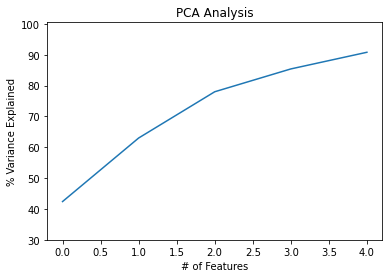

In [70]:
#Transform the data and find variance to explain data
pca = PCA(5)

covar_matrix = pca.fit(gene_corr)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
print(var)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

# Correlation between genes and growth rates

In [71]:
rho_list = []
growth_rate_list = metadata_clean['Growth Rate (1/hr)'].tolist()

for g in exp_data_clean.values:
    rho, p = stats.spearmanr(g, growth_rate_list)
    rho_list.append(rho)

LinregressResult(slope=0.041290819589396274, intercept=-0.33159567156787884, rvalue=0.38369232730155245, pvalue=8.447742448003519e-138, stderr=0.0015870496773769207)


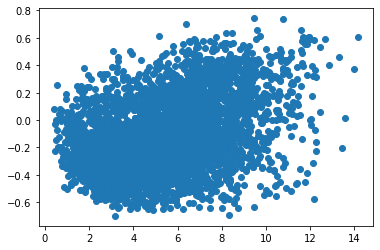

In [72]:
fig, ax = plt.subplots()
ax.scatter(avg_expression_list, rho_list)
print(stats.linregress(avg_expression_list, rho_list))

<AxesSubplot:xlabel='Kmeans_label'>

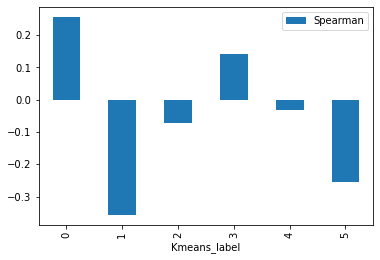

In [73]:
#Show average spearmanr with each cluster

kmeans_df = pd.DataFrame(data=zip(exp_data_t.columns.tolist(), rho_list,list(label)), columns=['Gene', 'Spearman', 'Kmeans_label'])
genes_avg = kmeans_df.groupby(['Kmeans_label']).mean().reset_index()
genes_avg.plot.bar(x='Kmeans_label', y='Spearman')